In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv(r"C:\Users\Acer\OneDrive\Desktop\Assessment\ML_Project\Electric_Vehicle_Population_Data.csv")

In [9]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJ3E1EBXK,King,Seattle,WA,98178.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220.0,0.0,37.0,477309682,POINT (-122.23825 47.49461),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,5YJYGDEE3L,Kitsap,Poulsbo,WA,98370.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291.0,0.0,23.0,109705683,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,KM8KRDAF5P,Kitsap,Olalla,WA,98359.0,2023,HYUNDAI,IONIQ 5,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,26.0,230390492,POINT (-122.54729 47.42602),PUGET SOUND ENERGY INC,5.303509e+10
3,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.81585 47.64509),PUGET SOUND ENERGY INC,5.303509e+10
4,JTMAB3FV7P,Thurston,Rainier,WA,98576.0,2023,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,2.0,236505139,POINT (-122.68993 46.88897),PUGET SOUND ENERGY INC,5.306701e+10


In [11]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 VIN (1-10)                                             0
County                                                 3
City                                                   3
State                                                  0
Postal Code                                            3
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        36
Base MSRP                                             36
Legislative District                                 494
DOL Vehicle ID                                         0
Vehicle Location                                      10
Electric Utility                                       3
2020 Census Tract                                      3
dtype: int64


In [13]:
df.fillna(df.mode().iloc[0], inplace=True)

In [15]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import xgboost as xgb

In [19]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [21]:
encoder= LabelEncoder()

In [23]:
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

In [25]:
scaler = StandardScaler()

In [27]:
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [29]:
from scipy.stats import zscore

In [31]:
z_scores = np.abs(zscore(df_scaled))
df_clean = df_scaled[(z_scores < 3).all(axis=1)]

In [33]:
print("Shape after outlier removal using Z-score:", df_clean.shape)

Shape after outlier removal using Z-score: (213336, 17)


In [35]:
df_clean.describe()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
count,213336.000000,213336.000000,213336.000000,2.133360e+05,213336.000000,213336.000000,213336.000000,213336.000000,213336.000000,213336.000000,213336.000000,2.133360e+05,213336.000000,213336.000000,213336.000000,213336.000000,213336.000000
mean,0.008239,-0.032380,-0.008445,3.881228e-02,0.027438,0.110145,-0.006815,-0.002239,-0.012785,0.058374,-0.109061,-1.096748e-01,0.033593,-0.010812,0.068937,0.070618,0.038714
std,1.004820,0.982499,1.002034,1.546406e-13,0.111267,0.911217,1.002187,0.998487,0.990612,0.953209,0.886505,2.164385e-13,0.983218,0.705683,0.876959,0.903794,0.010629
min,-1.755765,-2.108387,-1.857241,3.881228e-02,-0.069985,-2.809804,-2.234542,-2.685796,-0.510293,-1.306784,-0.550391,-1.096748e-01,-1.872902,-1.989800,-2.999274,-2.963184,0.016005
25%,-0.619923,-0.436314,-0.901978,3.881228e-02,-0.049780,-0.135920,-0.931280,-0.271401,-0.510293,-1.306784,-0.550391,-1.096748e-01,-0.731908,-0.391181,-0.470759,-0.209113,0.034414
50%,0.012228,-0.436314,0.265566,3.881228e-02,-0.022049,0.532552,0.755295,0.130998,-0.510293,0.358172,-0.550391,-1.096748e-01,0.274850,0.253176,-0.018288,0.622304,0.034427
75%,0.417933,0.721275,0.809004,3.881228e-02,0.075012,0.866787,0.755295,0.188484,-0.510293,0.358172,-0.169625,-1.096748e-01,0.878906,0.497601,0.531775,0.674268,0.047604
max,2.754174,2.028922,1.484057,3.881228e-02,0.469197,1.201023,1.138608,2.200479,1.959660,2.023128,2.935995,-1.096748e-01,1.348726,2.999986,2.377147,0.726231,0.063952


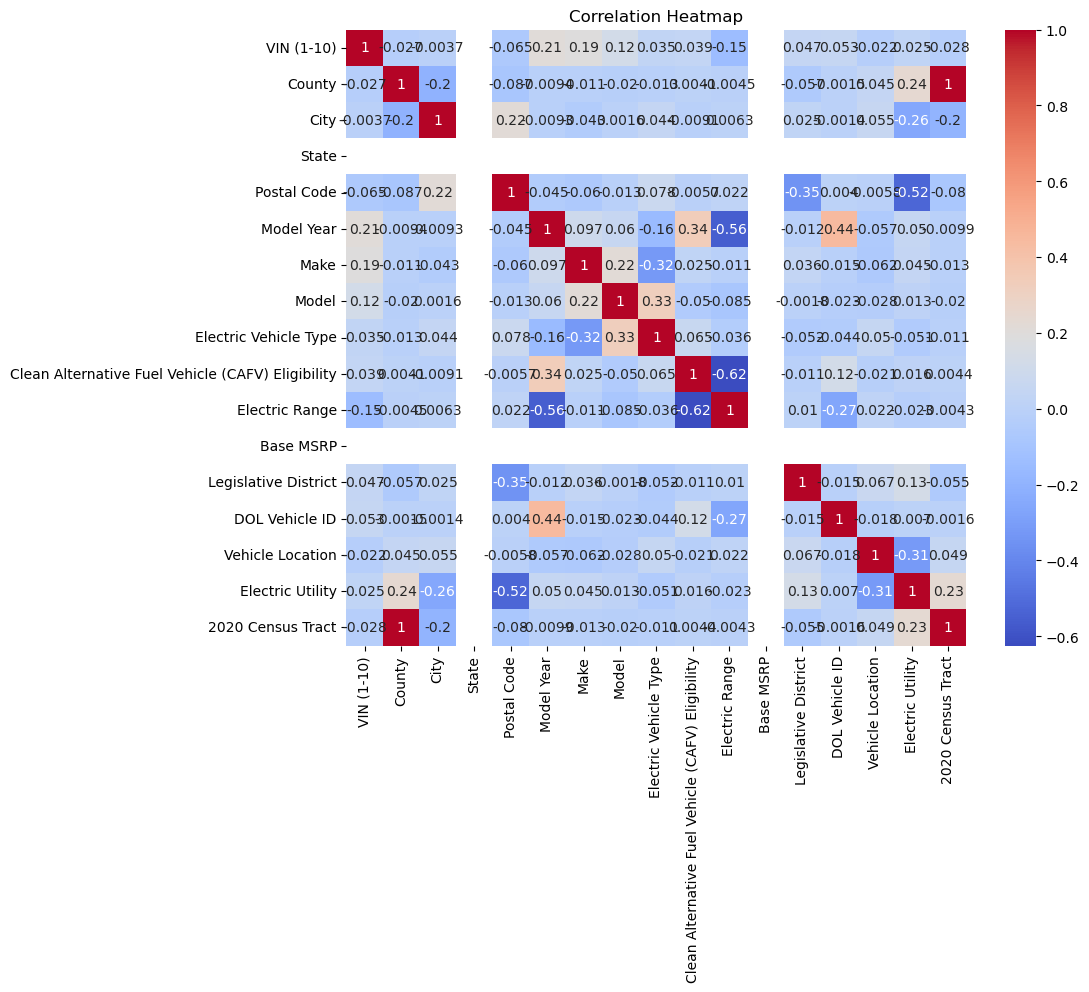

In [37]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

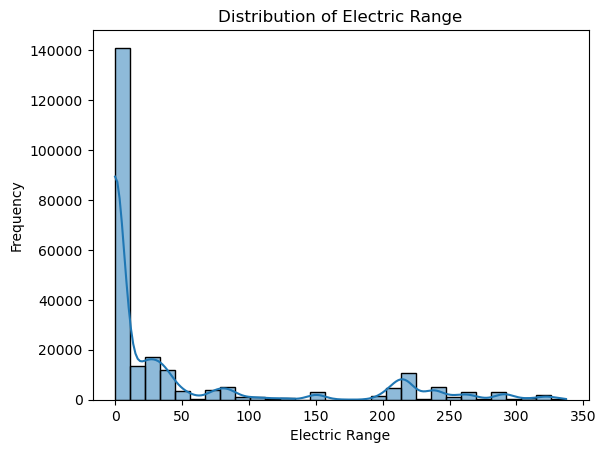

In [39]:
sns.histplot(df['Electric Range'], kde=True, bins=30)
plt.title('Distribution of Electric Range')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.show()

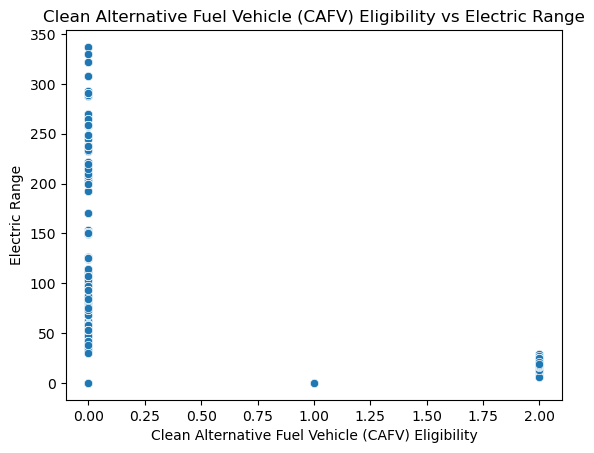

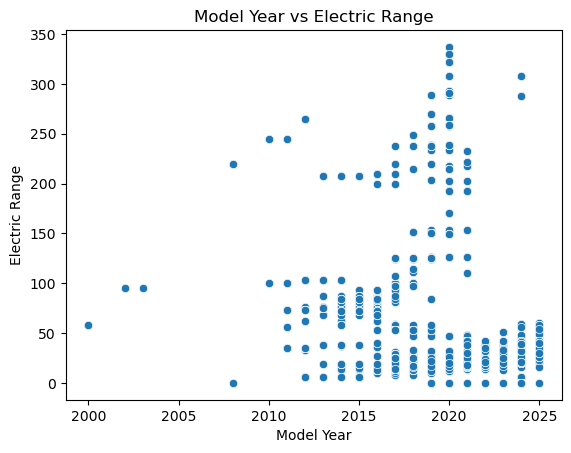

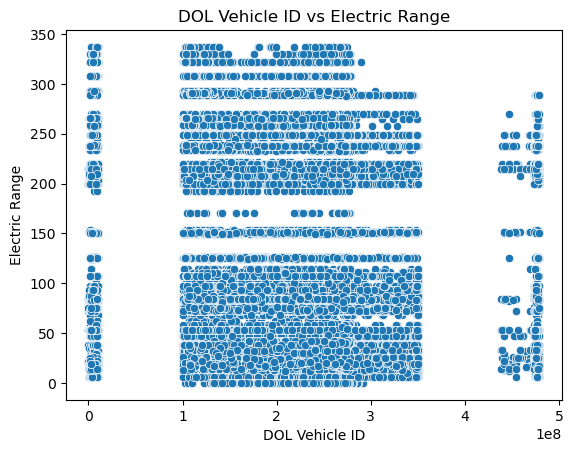

In [41]:
top_corr = df.corr(numeric_only=True)['Electric Range'].abs().sort_values(ascending=False)[1:4]
for col in top_corr.index:
    sns.scatterplot(x=col, y='Electric Range', data=df)
    plt.title(f'{col} vs Electric Range')
    plt.show()

In [42]:
print("\nData Description:\n", df_clean.describe())


Data Description:
           VIN (1-10)         County           City         State  \
count  213336.000000  213336.000000  213336.000000  2.133360e+05   
mean        0.008239      -0.032380      -0.008445  3.881228e-02   
std         1.004820       0.982499       1.002034  1.546406e-13   
min        -1.755765      -2.108387      -1.857241  3.881228e-02   
25%        -0.619923      -0.436314      -0.901978  3.881228e-02   
50%         0.012228      -0.436314       0.265566  3.881228e-02   
75%         0.417933       0.721275       0.809004  3.881228e-02   
max         2.754174       2.028922       1.484057  3.881228e-02   

         Postal Code     Model Year           Make          Model  \
count  213336.000000  213336.000000  213336.000000  213336.000000   
mean        0.027438       0.110145      -0.006815      -0.002239   
std         0.111267       0.911217       1.002187       0.998487   
min        -0.069985      -2.809804      -2.234542      -2.685796   
25%        -0.049780  

In [45]:
X = df_clean.drop('Electric Range', axis=1)
y = df_clean['Electric Range']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)

In [51]:
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
r2_dt = r2_score(y_test, y_pred_dt)

In [53]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)

In [55]:
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)

In [57]:
model_scores = {
    'Linear Regression': r2_lr,
    'Decision Tree': r2_dt,
    'Random Forest': r2_rf,
    'Gradient Boosting': r2_gb
}

In [59]:
best_model_name = max(model_scores, key=model_scores.get)
best_r2 = model_scores[best_model_name]

In [61]:
print(f"\n✅ Best Model: {best_model_name} with R² Score: {best_r2:.4f}")


✅ Best Model: Decision Tree with R² Score: 1.0000


In [63]:
if best_model_name == 'Linear Regression':
    best_model = lr
elif best_model_name == 'Decision Tree':
    best_model = dt
elif best_model_name == 'Random Forest':
    best_model = rf
else:
    best_model = gb

y_pred_best = best_model.predict(X_test)

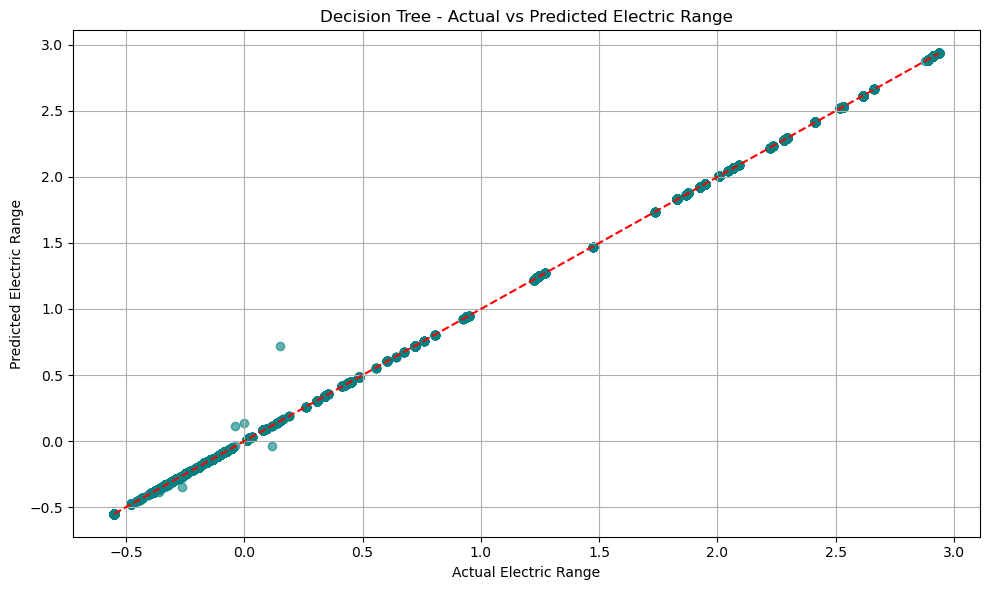

In [65]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_best, alpha=0.6, color='teal')
plt.xlabel("Actual Electric Range")
plt.ylabel("Predicted Electric Range")
plt.title(f"{best_model_name} - Actual vs Predicted Electric Range")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()